In [21]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [22]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [23]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [24]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [25]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [26]:
# Reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)
# Print the classes
print(Base.classes.keys())

['measurement', 'station']


In [27]:
# Reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)

# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement


In [28]:
# Create our session
session = Session(engine)

# Exploratory Precipitation Analysis

In [29]:
# Find the most recent date in the dataset
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(most_recent_date)


2017-08-23


In [30]:
# Convert the most recent date to a datetime object
most_recent_date = dt.datetime.strptime(most_recent_date, "%Y-%m-%d")

# Calculate the date one year ago from the most recent date
one_year_ago = most_recent_date - dt.timedelta(days=365)

# Print the one year ago date
print(one_year_ago)


2016-08-23 00:00:00


In [31]:
# Query the precipitation data for the previous 12 months
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).\
    order_by(Measurement.date).all()

# Print the query results
for date, prcp in results:
    print(f"Date: {date}, Precipitation: {prcp}")


Date: 2016-08-24, Precipitation: 0.08
Date: 2016-08-24, Precipitation: 2.15
Date: 2016-08-24, Precipitation: 2.28
Date: 2016-08-24, Precipitation: None
Date: 2016-08-24, Precipitation: 1.22
Date: 2016-08-24, Precipitation: 2.15
Date: 2016-08-24, Precipitation: 1.45
Date: 2016-08-25, Precipitation: 0.08
Date: 2016-08-25, Precipitation: 0.08
Date: 2016-08-25, Precipitation: 0.0
Date: 2016-08-25, Precipitation: 0.0
Date: 2016-08-25, Precipitation: 0.21
Date: 2016-08-25, Precipitation: 0.06
Date: 2016-08-25, Precipitation: 0.11
Date: 2016-08-26, Precipitation: 0.0
Date: 2016-08-26, Precipitation: 0.03
Date: 2016-08-26, Precipitation: 0.02
Date: 2016-08-26, Precipitation: 0.04
Date: 2016-08-26, Precipitation: 0.0
Date: 2016-08-26, Precipitation: 0.01
Date: 2016-08-27, Precipitation: 0.0
Date: 2016-08-27, Precipitation: 0.18
Date: 2016-08-27, Precipitation: 0.02
Date: 2016-08-27, Precipitation: 0.0
Date: 2016-08-27, Precipitation: 0.12
Date: 2016-08-27, Precipitation: None
Date: 2016-08-28, 

In [32]:
import pandas as pd

# Query the precipitation data for the previous 12 months
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).\
    order_by(Measurement.date).all()

# Create a Pandas DataFrame with explicit column names
df = pd.DataFrame(results, columns=['Date', 'Precipitation'])

# Print the DataFrame
print(df)



            Date  Precipitation
0     2016-08-24           0.08
1     2016-08-24           2.15
2     2016-08-24           2.28
3     2016-08-24            NaN
4     2016-08-24           1.22
...          ...            ...
2218  2017-08-22           0.50
2219  2017-08-23           0.00
2220  2017-08-23           0.00
2221  2017-08-23           0.08
2222  2017-08-23           0.45

[2223 rows x 2 columns]


In [33]:
# Sort the DataFrame by date
df = df.sort_values(by='Date')

# Print the sorted DataFrame
print(df)


            Date  Precipitation
0     2016-08-24           0.08
1     2016-08-24           2.15
2     2016-08-24           2.28
3     2016-08-24            NaN
4     2016-08-24           1.22
...          ...            ...
2218  2017-08-22           0.50
2221  2017-08-23           0.08
2219  2017-08-23           0.00
2220  2017-08-23           0.00
2222  2017-08-23           0.45

[2223 rows x 2 columns]


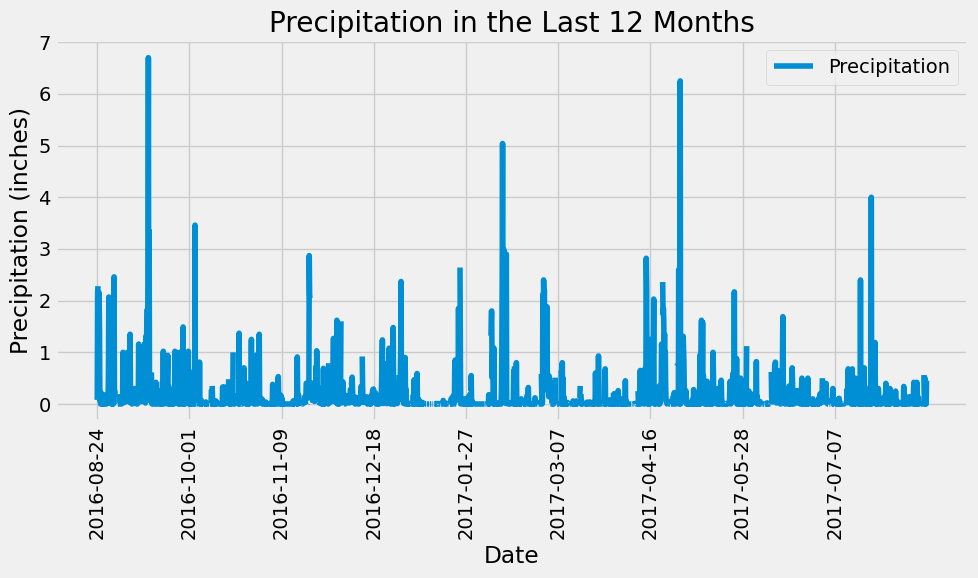

In [34]:
# Plot the precipitation data

df.plot(x='Date', y='Precipitation', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation in the Last 12 Months')


num_points = len(df)
step = num_points // 9

# Set the x-axis tick positions and labels
plt.xticks(range(0, num_points, step), df['Date'].iloc[::step], rotation=90)

plt.tight_layout()
plt.show()

In [35]:
# Print the summary statistics for the precipitation data
summary_stats = df.describe()
print(summary_stats)

       Precipitation
count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


# Exploratory Station Analysis

In [36]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station.station).count()
print(f"Total number of stations: {total_stations}")

Total number of stations: 9


In [37]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

# Print the stations and their counts
for station, count in most_active_stations:
    print(f"Station: {station}, Observation Count: {count}")


Station: USC00519281, Observation Count: 2772
Station: USC00519397, Observation Count: 2724
Station: USC00513117, Observation Count: 2709
Station: USC00519523, Observation Count: 2669
Station: USC00516128, Observation Count: 2612
Station: USC00514830, Observation Count: 2202
Station: USC00511918, Observation Count: 1979
Station: USC00517948, Observation Count: 1372
Station: USC00518838, Observation Count: 511


In [45]:
# Get the most active station ID
most_active_station = session.query(Measurement.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).\
    first()

most_active_station_id = most_active_station[0]

# Print the most active station ID
print(f"Most Active Station ID: {most_active_station_id}")

# Query the lowest, highest, and average temperatures for the most active station
temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station_id).all()

# Extract the temperature statistics
lowest_temp, highest_temp, avg_temp = temperature_stats[0]

# Print the temperature statistics
print(f"Lowest Temperature: {lowest_temp}°F")
print(f"Highest Temperature: {highest_temp}°F")
print(f"Average Temperature: {avg_temp}°F")

Most Active Station ID: USC00519281
Lowest Temperature: 54.0°F
Highest Temperature: 85.0°F
Average Temperature: 71.66378066378067°F


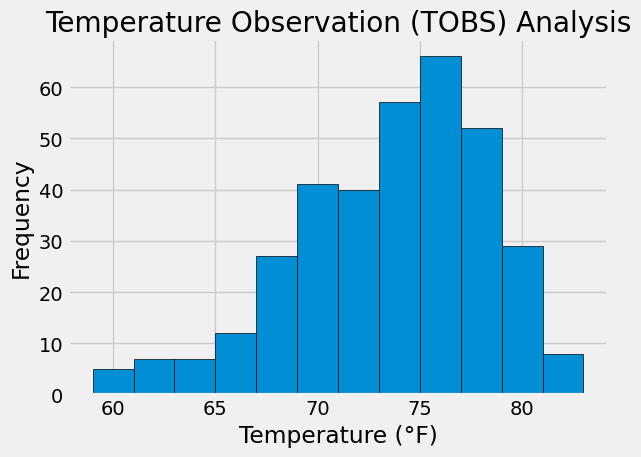

In [39]:
# Find the station with the greatest number of observations
most_active_station = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).\
    first().station

# Calculate the date one year ago from the last date in the dataset
one_year_ago = most_recent_date - dt.timedelta(days=365)

# Query the previous 12 months of TOBS data for the most active station
tobs_data = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= one_year_ago).\
    filter(Measurement.date <= most_recent_date).\
    all()

# Convert the query results to a list
tobs_list = [result[0] for result in tobs_data]

# Plot the histogram of TOBS data
plt.hist(tobs_list, bins=12, edgecolor='black')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title('Temperature Observation (TOBS) Analysis')
plt.tight_layout()
plt.show()


# Close Session

In [40]:
# Close Session
session.close()